# COVID19 - fastai version #

#### Disclaimer - This notebook is for educational purposes only. ####

#### Import Packages ####

In [2]:
from fastai.vision import *
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import pandas as pd
import zipfile as zf
from pathlib import Path

#### Unzip Files ####

In [10]:
#one time only - Covid Chest Xray
files = zf.ZipFile('./data/chestxray/covid_xray_images.zip','r')
files.extractall('./data/chestxray/')
files.close()

In [ ]:
#one time only - Normal Chest Xray
files = zf.ZipFile('./data/covid_xray/normal/normal_chest_xray.zip','r')
files.extractall('./data/covid_xray/normal/')
files.close()

#### loop through dataframe and narrow down real COVID19 cases ####

In [3]:
df = pd.read_csv('./data/chestxray/metadata.csv')
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,needed_supplemental_O2,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 27
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [4]:
df.dtypes

patientid                   int64
offset                    float64
sex                        object
age                       float64
finding                    object
survival                   object
intubated                  object
intubation_present         object
went_icu                   object
needed_supplemental_O2     object
extubated                  object
temperature               float64
pO2_saturation            float64
leukocyte_count           float64
neutrophil_count          float64
lymphocyte_count          float64
view                       object
modality                   object
date                       object
location                   object
folder                     object
filename                   object
doi                        object
url                        object
license                    object
clinical_notes             object
other_notes                object
Unnamed: 27                object
dtype: object

In [5]:
# sorting out real COVID19 cases
df2 = df.loc[(df['finding'] == 'COVID-19') & (df['view'] == 'PA')]

In [6]:
df2.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,needed_supplemental_O2,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 27
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [7]:
df2.shape

(144, 28)

In [8]:
filename = df2['filename']
source = './data/chestxray/'
destination = './data/Covid-fastai/covid/'

In [12]:
# move the real COVID19 images to the correct folder.
import os
import shutil

for index, row in df2.iterrows():
    try:
        shutil.move(source + str(row['filename']), destination + str(row['filename']))  

    except:
        pass  

In [13]:
path = Path('./data/Covid-fastai/')

In [14]:
classes = ['covid','normal']

In [15]:
# remove any images that cannot be opened.
for c in classes:
    print (c)
    verify_images(path/c, delete=True, max_size = 200)

covid


normal


## Basic CNN method ##

In [61]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4, bs=32).normalize(imagenet_stats)

In [27]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['covid', 'normal'], 2, 328, 81)

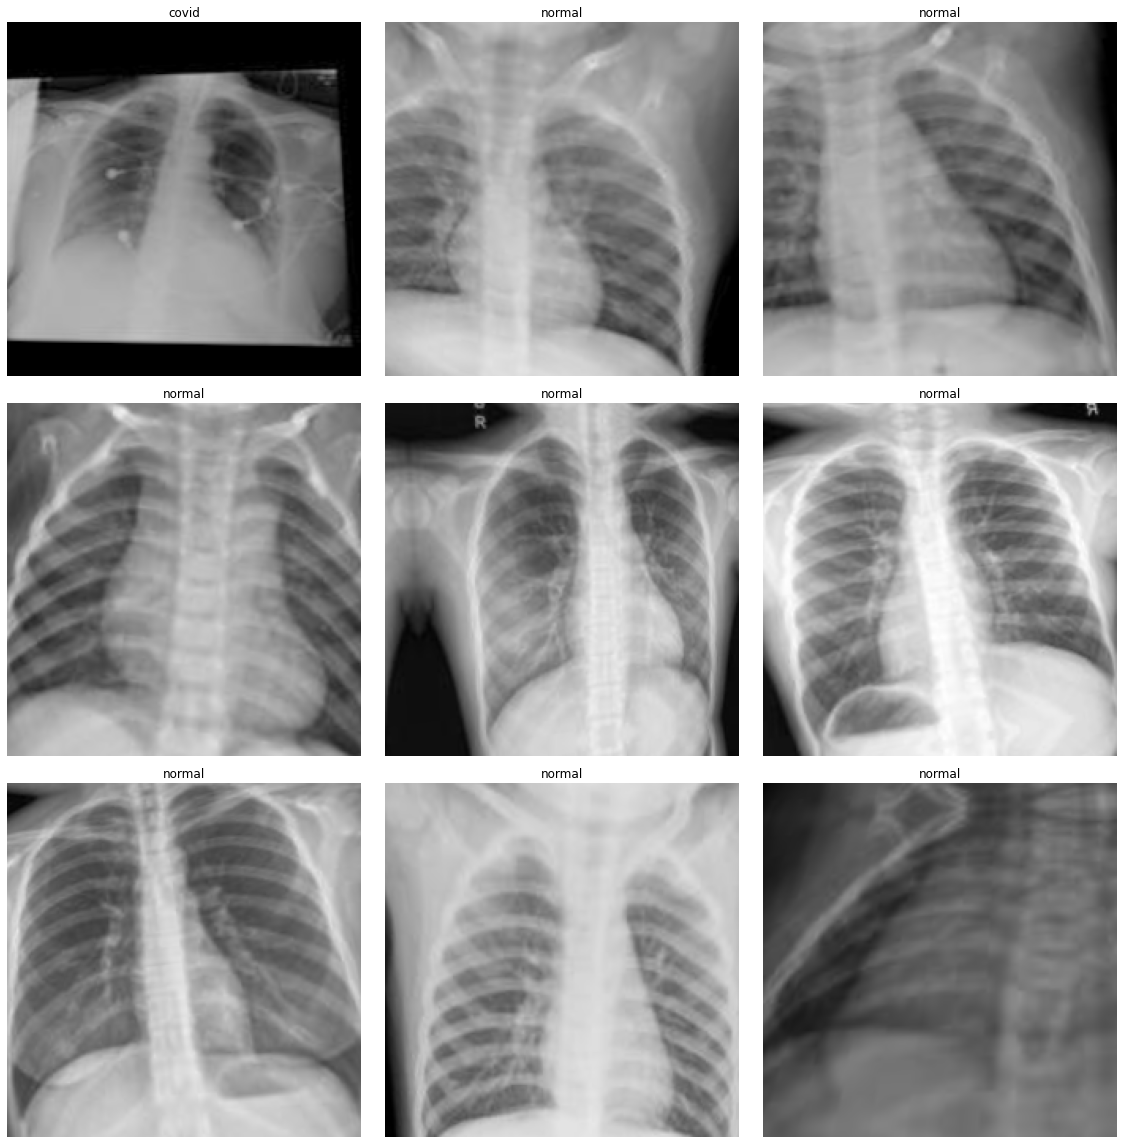

In [28]:
data.show_batch(rows=3, figsize=(16,16))

In [29]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [30]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.823724,0.204256,0.074074,00:02
1,0.531982,0.116432,0.024691,00:02
2,0.361754,0.071689,0.024691,00:02
3,0.259562,0.064858,0.024691,00:02


In [31]:
learn.save('Covid19_xray_stage_1')

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


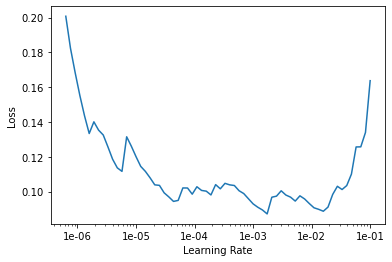

In [33]:
learn.recorder.plot()

In [34]:
learn.unfreeze()

In [35]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.114004,0.053480,0.012346,00:03
1,0.126543,0.065239,0.012346,00:02
2,0.120717,0.032662,0.012346,00:02
3,0.134796,0.015070,0.012346,00:03
4,0.100116,0.009602,0.012346,00:03


#### 98.77% accuracy! ####

In [36]:
learn.save('Covid19_xray_stage_2')

### Interpretation ###

In [37]:
learn.load('Covid19_xray_stage_2')

Learner(data=ImageDataBunch;

Train: LabelList (328 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,normal,normal,normal,normal
Path: data/Covid-fastai;

Valid: LabelList (81 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,normal,normal,normal,normal
Path: data/Covid-fastai;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, af

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

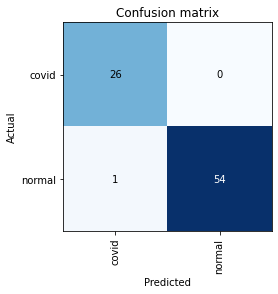

In [39]:
interp.plot_confusion_matrix()

## Data Augmentation Method##

In [40]:
bs, size = 32, 224

In [46]:
tfms = get_transforms(max_rotate=15, max_lighting=0.4, max_warp=0.1)

In [47]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=2)

In [48]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([\w\s.-]).[jpg]')
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [49]:
data = get_data(size, bs, 'zeros')

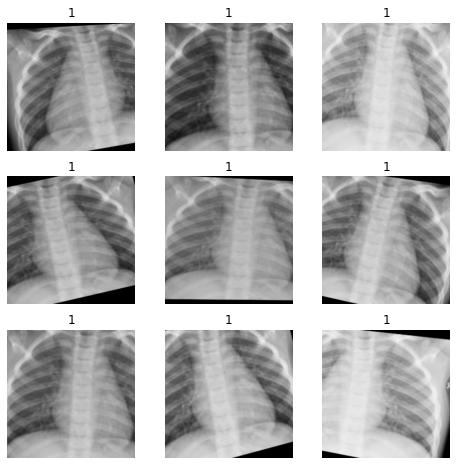

In [50]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)
    
plot_multi(_plot,3,3,figsize=(8,8))

In [51]:
data = get_data(size,bs)

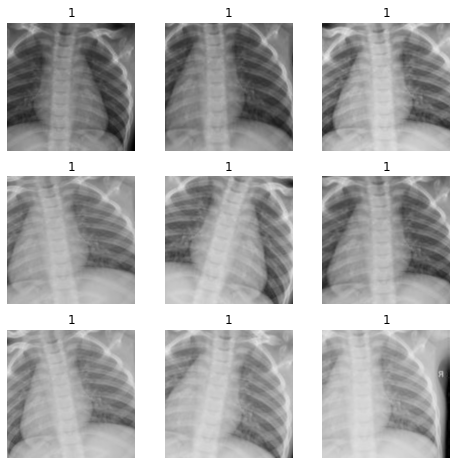

In [52]:
plot_multi(_plot, 3,3,figsize=(8,8))

In [53]:
gc.collect()
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [54]:
learn.fit_one_cycle(4, slice(1e-2), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,4.526284,3.036830,0.654321,00:02
1,3.508087,2.946835,0.345679,00:02
2,2.895597,2.821012,0.382716,00:02
3,2.478242,2.279613,0.296296,00:02


In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


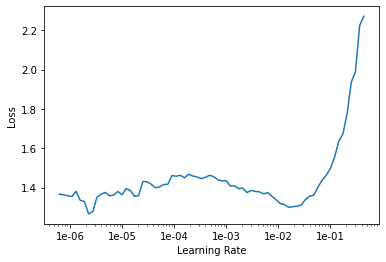

In [56]:
learn.recorder.plot()

In [57]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-3), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,1.366687,1.919093,0.283951,00:02
1,1.350218,1.850642,0.308642,00:02
2,1.317966,1.737296,0.308642,00:02
3,1.206997,1.641934,0.308642,00:02
4,1.189363,1.672951,0.308642,00:03
5,1.111528,1.487315,0.259259,00:03
6,1.066923,1.470169,0.271605,00:03
7,0.995792,1.532431,0.246914,00:03
8,0.924307,1.580393,0.271605,00:03
9,0.854264,1.483951,0.271605,00:02


#### 72.84%... worse than the CNN method ####

In [58]:
learn.save('Covid19_xray_stage_3')

#### Heatmap ####

In [62]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate).load('Covid19_xray_stage_2')

Category normal

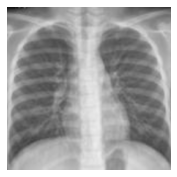

In [63]:
idx = 1
x,y = data.valid_ds[idx]
x.show()
data.valid_ds.y[idx]

In [64]:
m = learn.model.eval();

In [65]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [66]:
from fastai.callbacks.hooks import *

In [67]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a:
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a, hook_g

In [68]:
hook_a, hook_g = hooked_backward()

In [69]:
acts = hook_a.stored[0].cpu()
acts.shape

torch.Size([512, 7, 7])

In [70]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([7, 7])

In [71]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.7, extent=(0, 224, 224, 0),
             interpolation='bilinear', cmap='magma');

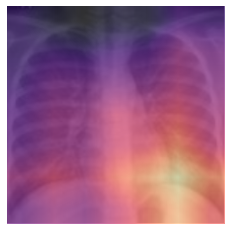

In [72]:
show_heatmap(avg_acts)

#### Grad_CAM ####

In [73]:
grad = hook_g.stored[0][0].cpu()
grad_chan = grad.mean(1).mean(1)
grad.shape, grad_chan.shape

(torch.Size([512, 7, 7]), torch.Size([512]))

In [74]:
mult = (acts*grad_chan[...,None, None]).mean(0)

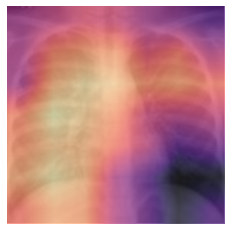

In [75]:
show_heatmap(mult)